In [1]:
# Lab 4 Multi-variable linear regression
import tensorflow as tf
import numpy as np

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical CPU, 1 Logical CPU


In [3]:
# +Add data before loading

!wget -O gdrivedl 'https://f.mjh.nz/gdrivedl'
!ls -l
!pwd

"""
!bash /kaggle/working/gdrivedl https://drive.google.com/file/d/1Bwgd9UA1ggjR_W1ma_IrFzFGhJYeTYQ-/view?usp=sharing
!ls -l /kaggle/working
inputdir = "/kaggle/working"
"""

!bash /content/gdrivedl https://drive.google.com/file/d/1Bwgd9UA1ggjR_W1ma_IrFzFGhJYeTYQ-/view?usp=sharing
!ls -l /content
inputdir = "/content"

--2020-12-13 01:16:50--  https://f.mjh.nz/gdrivedl
Resolving f.mjh.nz (f.mjh.nz)... 104.28.30.233, 104.28.31.233, 172.67.162.157, ...
Connecting to f.mjh.nz (f.mjh.nz)|104.28.30.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1362 (1.3K) [application/octet-stream]
Saving to: ‘gdrivedl’

gdrivedl            100%[===================>]   1.33K  --.-KB/s    in 0s      

2020-12-13 01:16:50 (19.8 MB/s) - ‘gdrivedl’ saved [1362/1362]

total 8
-rw-r--r-- 1 root root 1362 Jan 29  2019 gdrivedl
drwxr-xr-x 1 root root 4096 Dec  2 22:04 sample_data
/content
File ID: 1Bwgd9UA1ggjR_W1ma_IrFzFGhJYeTYQ-
Downloading: https://docs.google.com/uc?export=download&id=1Bwgd9UA1ggjR_W1ma_IrFzFGhJYeTYQ- > .88.file
Moving: .88.file > data-01-test-score.csv
Saved: data-01-test-score.csv
DONE!
total 12
-rw-r--r-- 1 root root  325 Dec 13 01:16 data-01-test-score.csv
-rw-r--r-- 1 root root 1362 Jan 29  2019 gdrivedl
drwxr-xr-x 1 root root 4096 Dec  2 22:04 sample_data


In [4]:
xy = np.loadtxt(os.path.join(inputdir, 'data-01-test-score.csv'), delimiter=',', dtype=np.float32)

In [5]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [6]:
# Make sure the shape and data are OK
print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [7]:
model = tf.keras.Sequential()

In [8]:
# activation function doesn't have to be added as a separate layer. Add it as an argument of Dense() layer
model.add(tf.keras.layers.Dense(units=1, input_dim=3, activation='linear'))

In [9]:
# tf.model.add(tf.keras.layers.Activation('linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))

In [11]:
history = model.fit(x_data, y_data, epochs=100, verbose=0)

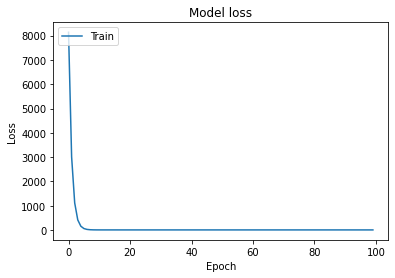

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
# Ask my score
print("Your score will be ", model.predict([[100, 70, 101]]))
print("Other scores will be ", model.predict([[60, 70, 110], [90, 100, 80]]))

Your score will be  [[193.33601]]
Other scores will be  [[190.6053 ]
 [170.28207]]
